In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [36]:
path="../resources/Indeed_Jobs_with_major_2020.csv"

df=pd.read_csv(path)

<AxesSubplot:xlabel='category'>

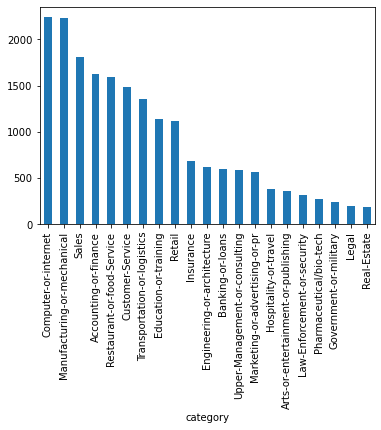

In [37]:
category=df.groupby('category')['job_title'].count().sort_values(ascending=False)
category.plot(kind='bar')

Field of study
Business                                                   8359
Computer and information sciences                          2242
Engineering                                                2231
Communication journalism and related programs              1487
Transportation and materials moving                        1350
Education                                                  1144
Architecture and related services                           621
Multi/interdisciplinary studies                             589
English language and literature/letters                     355
Homeland security law enforcement and\n   firefighting      312
Biological and biomedical sciences                          272
Homeland security law enforcement and\n   firefighting      239
Legal professions and studies                               200
Family and consumer sciences/human sciences                 186
Name: job_title, dtype: int64

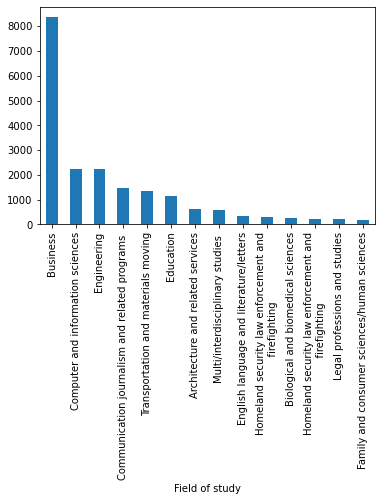

In [38]:

major=df.groupby('Field of study')['job_title'].count().sort_values(ascending=False)

major.plot(kind='bar')
major=major.reindex()
major

In [39]:
p1="../resources/Bachelors_degree_CSV.csv"
p2="../resources/Masters_degree_CSV.csv"
p3="../resources/Doctrate_degree_CSV.csv"

df1=pd.read_csv(p1)
df2=pd.read_csv(p2)
df3=pd.read_csv(p3)

df3.drop([1,2,34,35,36,37,38],0,inplace=True);
df2.drop([1,2,36,37,38,39,40],0,inplace=True);
df1.drop([1,2,36,37,38,39,40],0,inplace=True);

df1=df1.rename(columns=df1.iloc[0]).drop(df1.index[0])
df2=df2.rename(columns=df2.iloc[0]).drop(df2.index[0])
df3=df3.rename(columns=df3.iloc[0]).drop(df3.index[0])

df1=df1.fillna(0)
df2=df2.fillna(0)
df3=df3.fillna(0)

df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df3 = df3.replace(',','', regex=True)

def change_dtype(value):
      try:
          return int(value)
      except ValueError:
          try:
              return float(value)
          except ValueError:
              return value

for column in df1.columns:
      df1.loc[:, column] = df1[column].apply(change_dtype)
for column in df2.columns:
     df2.loc[:, column] = df2[column].apply(change_dtype)
for column in df3.columns:
      df3.loc[:, column] = df3[column].apply(change_dtype)
Mdf=pd.concat([df1, df2,df3]).groupby(['Field of study']).sum().reset_index()
# Mdf = Mdf.set_index('Field of study').T
Mdf=Mdf.set_index('Field of study')

Mdf=Mdf.rename(index={"Business\\2\\":"Business","Agriculture and natural resources\\1\\":"Agriculture and natural resources","Engineering technologies\\3\\":"Engineering technologies"})

Mdf=Mdf.reset_index()

In [40]:
Mdf

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Agriculture and natural resources,16215,23670,26956,21782,17604,27235,28769,28899,32707,35642,38695,41339,43076,44265,45223,46138,47780,49359
1,Architecture and related services,7311,12443,12701,12452,13406,12486,12935,15459,17541,17824,18430,18099,17444,17368,17061,16753,16005,16372
2,Area ethnic cultural gender and group studies,3754,4756,3850,4092,6168,7468,7931,10184,10648,11146,11477,11038,10455,9942,9930,9786,9727,9684
3,Biological and biomedical sciences,44933,63958,52484,46864,48468,72857,72818,85547,104793,109001,116204,121636,126923,132612,137450,141137,144059,147259
4,Business,142660,186669,259217,304299,328605,321543,380297,466150,538116,554597,561379,552332,550535,552093,561850,571849,581769,591289
5,Communication journalism and related programs,12239,23202,32495,45378,56032,52738,63599,81225,89480,92110,93339,94190,97576,100883,102856,104528,103196,103574
6,Communications technologies,564,1410,2074,1793,1614,1341,1607,3511,5248,5361,5484,5564,5571,5689,5319,5154,4760,4979
7,Computer and information sciences,1716,2847,4470,8414,10000,11448,17679,18611,19554,21104,22623,24616,26496,33473,42119,48535,48485,47891
8,Computer and information sciences,2388,5652,15121,42337,25159,24506,44142,47702,39593,43066,47406,50961,55271,59586,64402,71416,79597,88633
9,Education,270014,287700,212066,168573,204348,216566,239571,289441,292689,298777,294821,279922,264422,249949,244851,243446,241747,243398


In [41]:
Mdf=Mdf[["Field of study","2018-19"]]
Mdf['Major_sum']=Mdf.sum(axis=1)
Mdf=Mdf[["Field of study",'Major_sum']]

In [42]:
plot_df=pd.merge(major,Mdf,on="Field of study")
plot_df['Major_sum']=plot_df['Major_sum']

<AxesSubplot:xlabel='Field of study'>

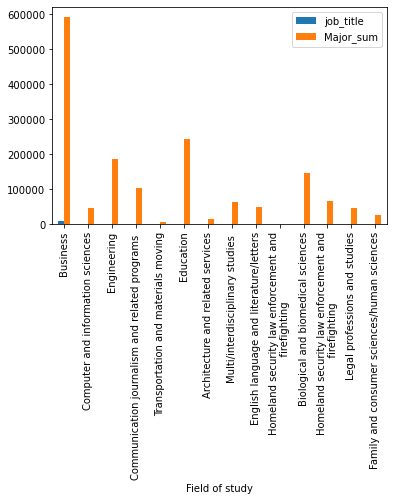

In [43]:
plot_df.plot(kind='bar',x="Field of study")

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as st

The correlation between both factors is 0.89


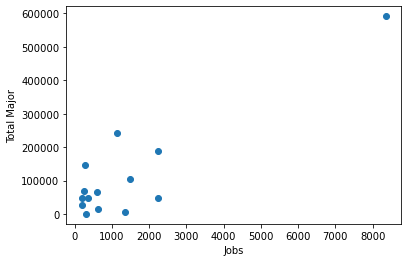

[8359, 2242, 2231, 1487, 1350, 1144, 621, 589, 355, 312, 272, 239, 200, 186]
[591289, 47891, 187512, 103574, 5837, 243398, 16372, 64919, 48826, 250, 147259, 67642, 48115, 27534]


In [45]:
jobs = plot_df["job_title"]
majors = plot_df["Major_sum"]
correlation = st.pearsonr(jobs,majors)
plt.scatter(jobs,majors)
plt.xlabel('Jobs')
plt.ylabel('Total Major')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
print(jobs.tolist())
print(majors.tolist())

In [46]:
ndf=df.dropna()
ndf

,Field of study,sum,job_title,category,company_name,city,state,country,post_date,job_type,is_remote,salary_offered
19,Architecture and related services,272090,Alaska Satellite Facility - Product Owner,Engineering-or-architecture,University of Alaska,(function(_){_.__JS_ERROR__=[];_.onerror=funct...,'+'pageId:'+e+',US,2020-12-11,Full-time,True,Salary Information:
24,Architecture and related services,272090,Mechanical Engineer - Intermediate,Engineering-or-architecture,Methodica Technologies,Auburn Hills,MI,US,2020-11-10,Full-time,True,Pay: $30.00 - $35.00 per hour
31,Architecture and related services,272090,Mechanical Engineer,Engineering-or-architecture,Contour Crafting Corp,El Segundo,CA,US,2020-12-30,Full-time|Contract,False,"Pay: $60,000.00 - $85,000.00 per year"
39,Architecture and related services,272090,Physical Science Technician,Engineering-or-architecture,US Department of Agriculture,Pinedale,WY,US,2020-10-31,Part-time|Full-time|Temporary,False,PLEASE NOTE: This vacancy is being used to fil...
42,Architecture and related services,272090,"Senior Software Engineer, .NET/Xamarin",Engineering-or-architecture,Tri-Starr Technology,San Antonio,TX,US,2020-10-12,Full-time,False,"Pay: Up to $130,000.00 per year"
...,...,...,...,...,...,...,...,...,...,...,...,...
19577,Transportation and materials moving,80159,"Supervisor- Warehouse, Stockroom, and Receiving",Transportation-or-logistics,Elements Lighting + Decor,Carle Place,NY,US,2020-12-11,Full-time,False,Pay: $18.00 per hour
19578,Transportation and materials moving,80159,Bus Driver - Conway School District *FREE TRAI...,Transportation-or-logistics,School Administrative Unit #9,Conway,NH,US,2020-10-06,Full-time,False,TERMS OF EMPLOYMENT: Salary and work year to b...
19580,Transportation and materials moving,80159,Delivery Driver,Transportation-or-logistics,JKT Logistics LLC,Appleton,WI,US,2020-10-08,Part-time|Full-time|Temporary,False,Pay: $15.00 - $18.00 per hour
19583,Transportation and materials moving,80159,Routing/Logistics Coordinator,Transportation-or-logistics,"Mr. Brands, LLC.",Bristol,PA,US,2020-10-05,Full-time,False,Salary:


In [47]:
df

,Field of study,sum,job_title,category,company_name,city,state,country,post_date,job_type,is_remote,salary_offered
0,Architecture and related services,272090,Engineer I (Trans),Engineering-or-architecture,Entergy,Little Rock,AR,US,2020-12-16,Full-time,False,NaN
1,Architecture and related services,272090,Research Technician,Engineering-or-architecture,Lydall,Rochester,NH,US,2020-11-23,Full-time,False,NaN
2,Architecture and related services,272090,Minerals Processing Engineer,Engineering-or-architecture,Barr Engineering,Salt Lake City,UT,US,2020-11-06,Full-time,False,NaN
3,Architecture and related services,272090,Dimensional Engineer --8784-3,Engineering-or-architecture,Solize USA Corporation,Warren,MI,US,2020-11-06,Full-time,True,NaN
4,Architecture and related services,272090,Senior Project Manager- City of Charlotte,Engineering-or-architecture,South Carolina Chapter of the American Plannin...,(function(_){_.__JS_ERROR__=[];_.onerror=funct...,'+'pageId:'+e+',US,2020-12-08,Full-time,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19582,Transportation and materials moving,80159,Receiving Clerk,Transportation-or-logistics,El Super Markets | El Super,(function(_){_.__JS_ERROR__=[];_.onerror=funct...,'+'pageId:'+e+',US,2020-12-05,Full-time,False,NaN
19583,Transportation and materials moving,80159,Routing/Logistics Coordinator,Transportation-or-logistics,"Mr. Brands, LLC.",Bristol,PA,US,2020-10-05,Full-time,False,Salary:
19584,Transportation and materials moving,80159,Starbucks Clerk,Transportation-or-logistics,Kroger Stores,Dallas,GA,US,2020-11-01,Part-time,False,NaN
19585,Transportation and materials moving,80159,"Manager, Operations - Transportation",Transportation-or-logistics,FedEx Supply Chain,Columbus,OH,US,2020-11-06,Full-time,False,NaN


In [48]:
import itertools
import collections
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
from wordcloud import WordCloud

def plot_wordcloud(data, col, text = None):
    stop = stopwords.words('english')
    all_words = [word for word in data[col] if word not in stop]
    word_freq = Counter(all_words)

    wordcloud = WordCloud(width = 900,
                          height = 500,
                          max_words = 200,
                          max_font_size = 100,
                          relative_scaling = 0.5,
                          background_color = "rgba(255, 255, 255, 0)", 
                          mode = "RGBA",
                          normalize_plurals = True).generate_from_frequencies(word_freq)
    plt.figure(figsize = (18, 16))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(text, fontsize = 20, color = 'Red', y = 1.05)
    plt.axis("off")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


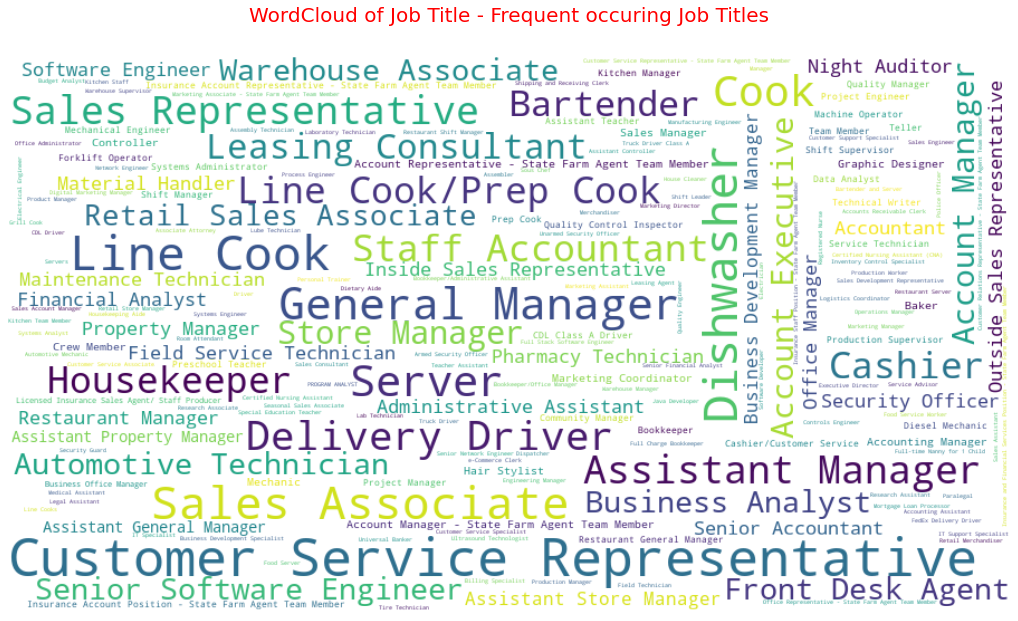

In [49]:
plot_wordcloud(df, 'job_title', 'WordCloud of Job Title - Frequent occuring Job Titles')

In [50]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [51]:
df['state'].value_counts().sort_values(ascending = True).iplot(kind = 'bar', 
                                                                  orientation = 'h',
                                                                  yTitle = 'States',
                                                                  title = 'States with most Job Vacancies'
                                                                 )

In [52]:
print(f"Number of companies doing Job postings: {df['company_name'].nunique()}")

Number of companies doing Job postings: 13799


In [53]:
df['company_name'].value_counts().sort_values(ascending = False)[:50].iplot(kind = 'bar', 
                                                                  orientation = 'h',
                                                                  yTitle = 'Company Names',
                                                                  colors = 'grey',
                                                                  title = 'Companies by their Vacancies'
                                                                 )

In [54]:
import plotly.express as px #Plotly Express
jobtypes = df['job_type'].value_counts()
px.pie(jobtypes, values = jobtypes.values, names = jobtypes.index,
       title = 'No. of Job Postings by Job_Type',
      color_discrete_sequence = px.colors.qualitative.Pastel)